## Nearest Neighbors
### Agenda
1. Fundamentals of Nearest Neighbor
2. Unspervised Nearest Neighbors
3. Nearest Neighbors for Classification
4. Nearest Neighbors for Regression
5. Nearest Centroid Classifier

### 1. Fundamentals of Nearest Neighbor
* These are non-generalizing learning models .i.e simply stores all the training data.
* Stores data into fast access data structure like Ball Tree & KD Tree
* The principle behind nearest neighbor methods is to find a predefined number of training samples closest in distance to the new point, and predict the label/value from these.
* The number of samples can be a user-defined constant or configured radius
* Very useful when decision boundry is very irregular.

### 2. Unsupervised Nearest Neighbor
* Based on the algorithm configured training data is stored
* For an unknown data, return the shortest Euclidean distance between configured k
* Euclidean distance is calculated as the square root of the sum of the squared differences between a new point (x) and an existing point (xi) across all input attributes j.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
from sklearn.neighbors import NearestNeighbors

In [18]:
nn = NearestNeighbors(radius=5, algorithm='ball_tree')

In [19]:
from sklearn.datasets import make_blobs

In [20]:
X,_ = make_blobs(n_features=2, n_samples=30, cluster_std=.7)

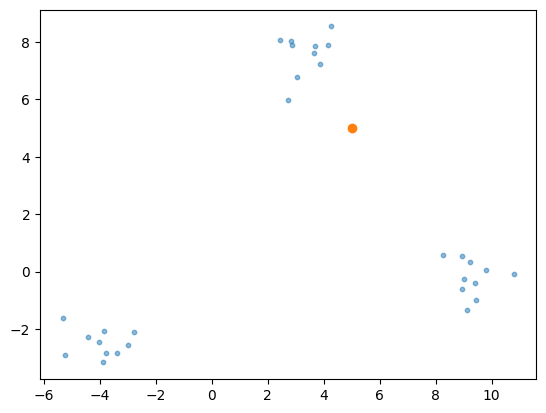

In [21]:
plt.scatter(X[:,0], X[:,1], s=10,alpha=.5)
plt.scatter([5],[5])

In [22]:
nn.fit(X)

NearestNeighbors(algorithm='ball_tree', radius=5)

In [23]:
nn.kneighbors([[5,5]])

(array([[2.45361647, 2.50953461, 2.62961297, 2.94776959, 3.01653278]]),
 array([[10,  2, 20, 23,  4]]))

In [24]:
_,X_nearest = nn.kneighbors([[5,5]])

In [25]:
nearest = X[X_nearest[0]]

In [26]:
X_nearest

array([[10,  2, 20, 23,  4]])

<ipython-input-27-94dab965590c>:2: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(nearest[:,0], nearest[:,1], s=10 ,cmap='virdis')


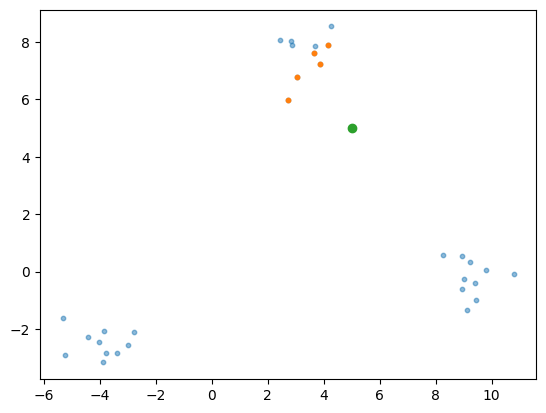

In [27]:
plt.scatter(X[:,0], X[:,1], s=10,alpha=.5)
plt.scatter(nearest[:,0], nearest[:,1], s=10 ,cmap='virdis')
plt.scatter([5],[5])

### 3. Nearest Neighbors for Classification
* A query point is assigned the data class which has the most representatives within the nearest neighbors of the point.
* Two types of nearest neighbor classifier
  - KNeighboursClassifier ( based on configured k )
  - RadiusNeighbourClassifier ( based on configured r )
* Weights can be ‘uniform’ or ‘distance’. It  assigns weights proportional to the inverse of the distance from the query point.

In [28]:
from sklearn.neighbors import KNeighborsClassifier,RadiusNeighborsClassifier

In [29]:
knc = KNeighborsClassifier(n_neighbors=5)
rnc = RadiusNeighborsClassifier(radius=5)

In [30]:
X,Y = make_blobs(n_features=2, n_samples=80, cluster_std=5, centers=2)

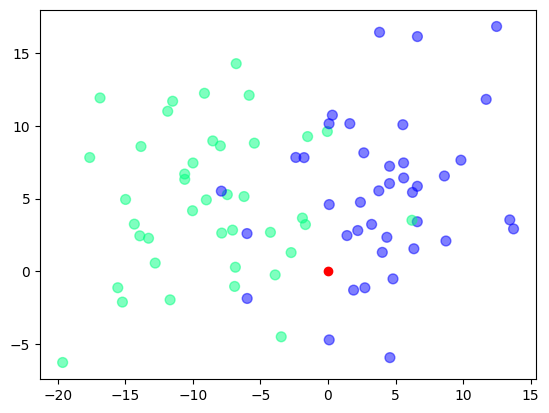

In [32]:
plt.scatter(X[:,0], X[:,1], s=50,alpha=.5, c=Y, cmap='winter')
plt.scatter([0],[0],c='r')

In [33]:
knc.fit(X,Y)
rnc.fit(X,Y)

RadiusNeighborsClassifier(radius=5)

In [35]:
knc_pred = knc.predict([[0,0]])

In [36]:
knc_pred

array([0])

In [37]:
knc.kneighbors([[5,-5]])

(array([[1.01909012, 4.48581163, 4.48583875, 4.83609032, 4.91888904]]),
 array([[28,  1, 78, 75, 76]]))

In [38]:
_, knc_neighbors = knc.kneighbors([[0,0]])

In [39]:
knc_neighbors

array([[75, 38,  1, 56, 58]])

In [40]:
rnc_pred = rnc.predict([[0,0]])

In [41]:
rnc_pred

array([0])

In [42]:
rnc.radius_neighbors([[0,0]])

(array([array([3.9177067 , 3.01793074, 4.12066904, 3.6221043 , 2.83254286,
               4.58996551, 3.56671902, 4.56604544, 4.94676478, 4.22572155,
               2.29399573, 4.71208097, 4.83934133, 2.95570744])           ],
       dtype=object),
 array([array([19, 56, 55, 22, 38, 21, 58, 20, 11, 67, 75, 76, 78,  1])],
       dtype=object))

In [43]:
_, rnc_neighbors = rnc.radius_neighbors([[0,0]])

In [44]:
rnc_neighbors[0]

array([19, 56, 55, 22, 38, 21, 58, 20, 11, 67, 75, 76, 78,  1])

#### Visualizing for NearestNeighbourClassifier

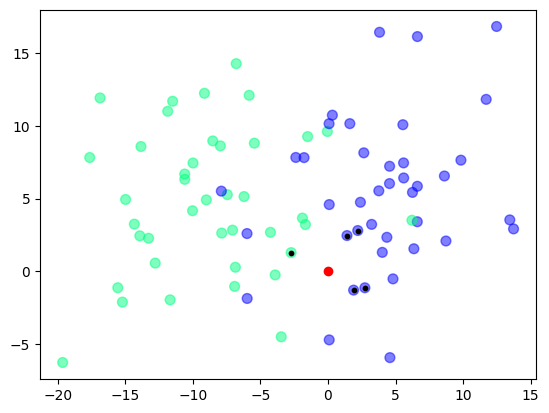

In [45]:
nearest = X[knc_neighbors[0]]
plt.scatter(X[:,0], X[:,1], s=50,alpha=.5, c=Y, cmap='winter')
plt.scatter([0],[0],c='r')
plt.scatter(nearest[:,0], nearest[:,1], s=10, c='k')

#### Visualizing for RadiusNeighbourClassifier

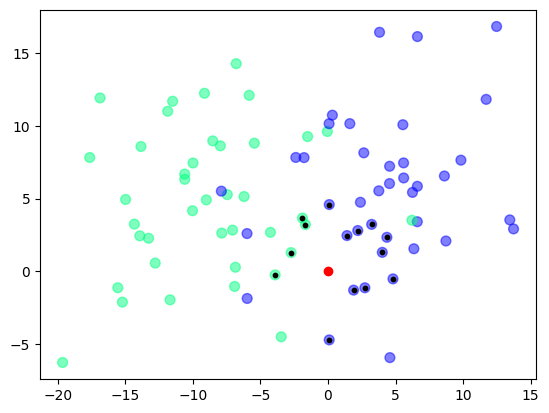

In [46]:
nearest = X[rnc_neighbors[0]]
plt.scatter(X[:,0], X[:,1], s=50,alpha=.5, c=Y, cmap='winter')
plt.scatter([0],[0],c='r')
plt.scatter(nearest[:,0], nearest[:,1], s=10, c='k')

* Understanding weights - Nearer neighbor has more impact when configured with weight='distance' parameter

In [47]:
rnc = RadiusNeighborsClassifier(radius=5, weights='distance')

In [48]:
from sklearn.datasets import load_iris
iris = load_iris()

print (iris)

{'data': array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
     

In [49]:
from sklearn.model_selection import train_test_split
x_train , x_test, y_train, y_test = train_test_split(iris.data, iris.target)

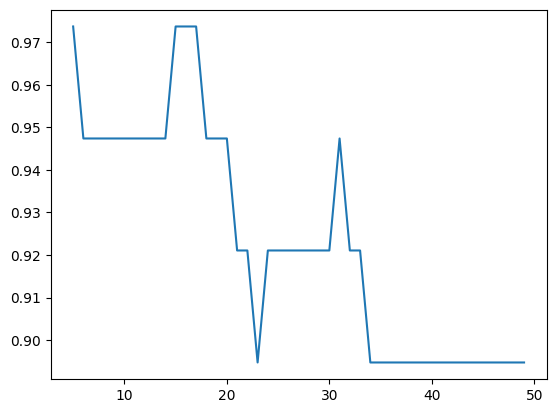

In [50]:
acc_score = []
for i in range(5,50):
    knc = KNeighborsClassifier(n_neighbors= i)
    knc.fit(x_train, y_train)
    acc = knc.score(x_test, y_test)
    acc_score.append(acc)

import matplotlib.pyplot as plt

plt.plot (list(range(5,50)), acc_score)
plt.show()



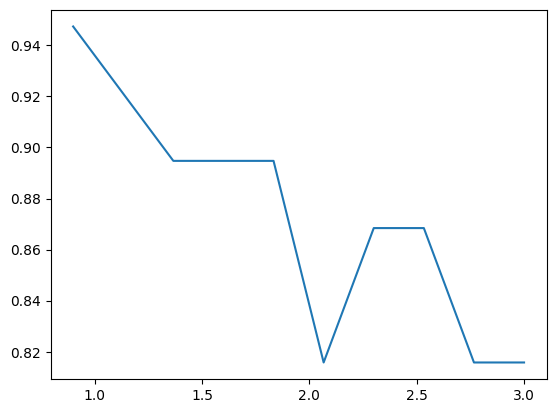

In [56]:
acc_score = []
for i in np.linspace(0.9, 3, 10):
    rnc = RadiusNeighborsClassifier(radius=i)
    rnc.fit(x_train, y_train)
    acc = rnc.score(x_test, y_test)
    acc_score.append(acc)

import matplotlib.pyplot as plt

plt.plot (np.linspace(0.9,3, 10), acc_score)
plt.show()

#### Impact of number of neighbors on decision boundry
<img src="https://github.com/awantik/machine-learning-slides/blob/master/mlnn4.png?raw=true">

<img src="https://github.com/awantik/machine-learning-slides/blob/master/mlnn3.png?raw=true">

### 4. Nearest Neighbors for Regression
* The labels of data are continues
* The label assigned to a query point is computed based the mean/medium of the labels of its nearest neighbors.
* Neighbors to be considered can be based on count or radius distance
  - KNeighbourRegressor
  - RadiusNeighbourRegressor
* 'weight' parameter to control impact of neighbor based on closeness
* NearestNeighborRegressor is capable of predicting mutiple outputs

In [57]:
from sklearn.datasets import fetch_olivetti_faces

In [58]:
faces = fetch_olivetti_faces()

downloading Olivetti faces from https://ndownloader.figshare.com/files/5976027 to /root/scikit_learn_data


In [59]:
targets = faces.target

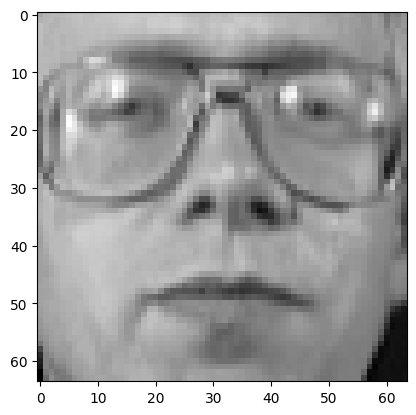

In [60]:
plt.imshow(faces.images[11], cmap='gray')

In [61]:
faces.images.shape

(400, 64, 64)

In [62]:
faces.data.shape

(400, 4096)

In [63]:
train = faces.data[targets < 30]
test = faces.data[targets >= 30]

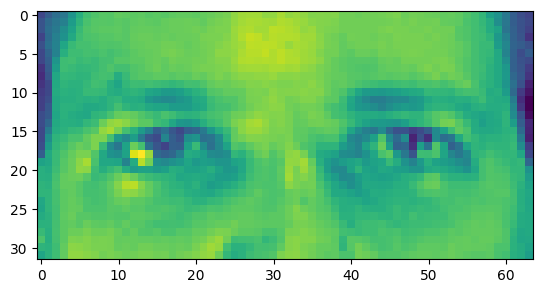

In [64]:
plt.imshow(train[0][:2048].reshape(32,64))

In [65]:
trainX = train[:,:2048]
trainY = train[:,2048:]
testX = test[:,:2048]
testY = test[:,2048:]

In [66]:
from sklearn.neighbors import KNeighborsRegressor

In [67]:
nn_r = KNeighborsRegressor(n_neighbors=20,weights='distance', n_jobs=-1)

In [68]:
nn_r.fit(trainX,trainY)

KNeighborsRegressor(n_jobs=-1, n_neighbors=20, weights='distance')

In [69]:
sample = testX[::10]

In [70]:
res = nn_r.predict(sample)

In [71]:
final = np.hstack([sample,res])

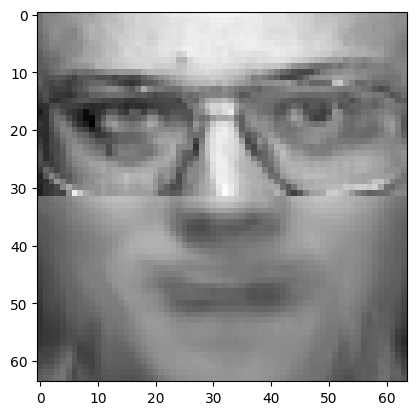

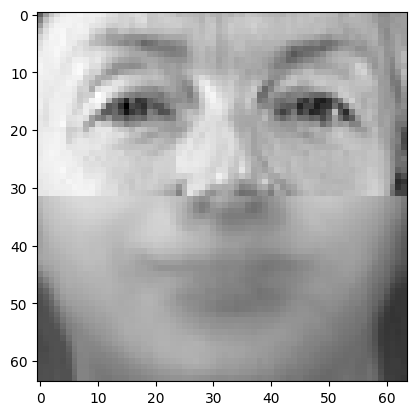

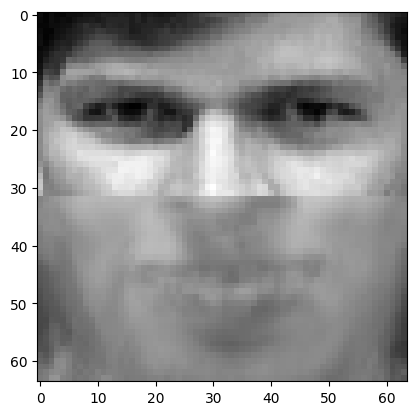

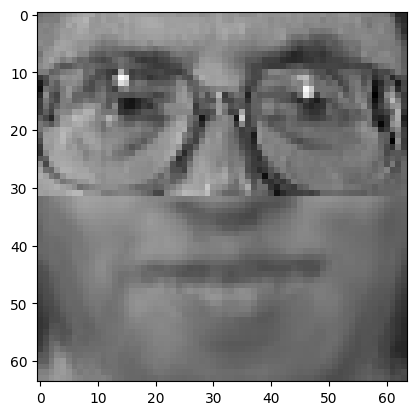

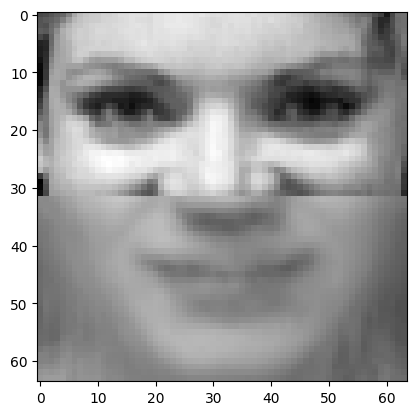

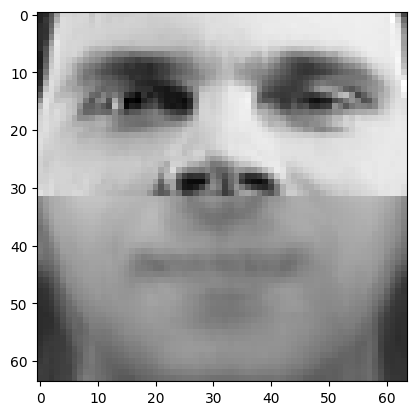

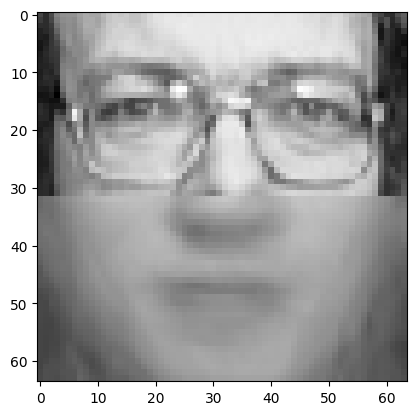

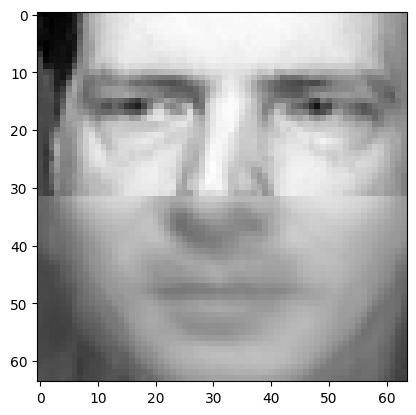

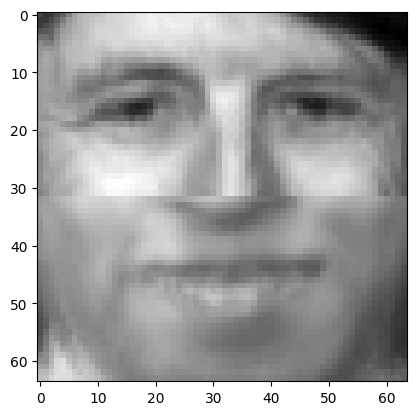

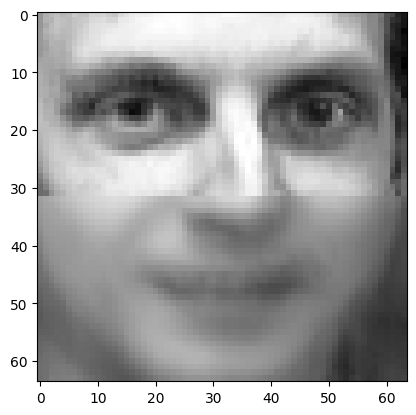

In [72]:
for img in final:
    plt.imshow(img.reshape(64,64), cmap='gray')
    plt.show()

### Nearest Centroid Classifier
* Used for classification
* Computes the centroid for each class.
* Measures the distance ( generally Euclidean ) of the data point X to the centroid of each class.
* If the distance is of X and the centroid of a particular class is minimum then it assigns that class to the data point X ( The argmin statement in the picture you have provided ) i.e Y predicts the centroid closest to the point X
* It's different from KMeans, since KMeans identifies the clusters & here we assign data to cluster

In [73]:
from sklearn.neighbors import NearestCentroid

In [74]:
from sklearn.datasets import load_iris

In [75]:
iris = load_iris()

In [76]:
nc = NearestCentroid()

In [77]:
nc.fit(iris.data, iris.target)

NearestCentroid()

In [78]:
nc.score(iris.data, iris.target)

0.9266666666666666